In [89]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Hospital.csv')
data.drop(columns=[col for col in data.columns if 'unnamed' in col.lower()], inplace=True)
colors = ['#64bb46', "#DDF1D6", "#21520F"]

data['Image'] = data.LLM.apply(lambda x: True if "image" in x.lower() else False)
data['Image'] = data['Image'].astype(bool)
data['LLM'] = data.apply(
    lambda row: row['LLM'] + " (One-shot)" if row['Prompt'] == "LTNER/GPT-NER" else row['LLM'] + " (Zero-shot)" if row['Prompt'] == "Normal" else row['LLM'],
    axis=1
)


In [90]:

data.Prompt.fillna("None", inplace=True)
data.Parsed.fillna(True, inplace=True)

/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/2312198590.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Prompt.fillna("None", inplace=True)
/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/2312198590.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [91]:
data.isnull().sum()

LLM                        0
False Positives          287
False Negatives          287
Incorrect Extractions    287
Correct Matches          287
Precision                287
Recall                   287
F1score                  287
Accuracy                 287
Parsed                     0
Hospital                   0
Prompt                     0
Distressed                 0
Image                      0
dtype: int64

In [92]:
# Ensure F1score is numeric
data['F1score'] = pd.to_numeric(data['F1score'], errors='coerce')
df = data.copy()
#df.drop(data[data["LLM"].str.contains("gpt")].index, inplace=True)
# Group by LLM, Image, and Prompt, and calculate the mean F1score
g = df.groupby(["LLM", "Image", "Prompt"]).F1score.mean().sort_values(ascending=False)
g

LLM                                   Image  Prompt       
gpt-4.1-mini (One-shot)               False  LTNER/GPT-NER    66.600374
gpt-4.1-mini (Zero-shot)              False  Normal           63.048017
gemma327b*ImageInput* (Zero-shot)     True   Normal           51.452168
llama3.170b (One-shot)                False  LTNER/GPT-NER    40.565449
llama3.170b (Zero-shot)               False  Normal           39.905849
mistral(24b) (Zero-shot)              False  Normal           31.392371
mistral(24b) (One-shot)               False  LTNER/GPT-NER    30.183561
NuExtract:4B                          False  None             27.890795
gemma327b*ImageInput* (One-shot)      True   LTNER/GPT-NER    27.526899
mistral(24b)*ImageInput* (Zero-shot)  True   Normal           23.392344
gpt-4.1-mini*ImageInput* (One-shot)   True   LTNER/GPT-NER    21.134443
gpt-4.1-mini*ImageInput* (Zero-shot)  True   Normal           20.127479
gemma327b (One-shot)                  False  LTNER/GPT-NER    17.203308
gemma

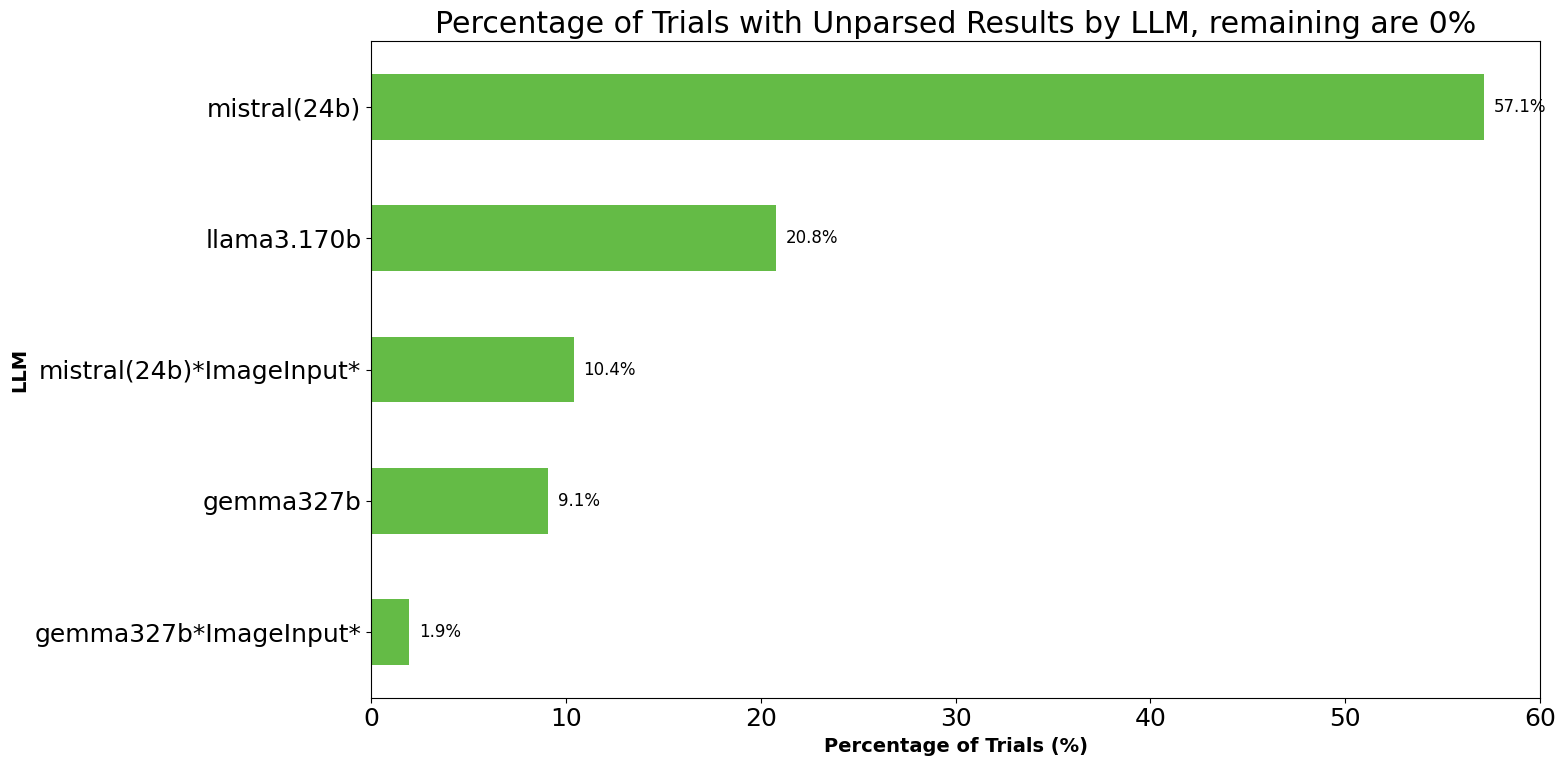

In [103]:
# Calculate percentage of unparsed results by LLM
data["BaseLLM"] = data.LLM.apply(lambda x: x.split(" (")[0]).replace("*ImageInput*", " (Image Input)")

unparsed_counts = data.loc[data["Parsed"] == False].BaseLLM.value_counts()
total_counts = data.BaseLLM.value_counts()
unparsed_percentages = (unparsed_counts / total_counts * 100).fillna(0)
# Sort by percentage for better visualization
unparsed_percentages = unparsed_percentages.sort_values(ascending=True)
unparsed_percentages = unparsed_percentages[unparsed_percentages > 0]
ax = unparsed_percentages.plot(kind='barh', color=colors[0], figsize=(16, 8))
plt.title("Percentage of Trials with Unparsed Results by LLM, remaining are 0%")
plt.xlabel("Percentage of Trials (%)", fontsize=14, fontweight='bold')
plt.ylabel("LLM", fontdict={'size': 14, 'weight': 'bold'})

# Add percentage labels on bars
for i, (model, percentage) in enumerate(unparsed_percentages.items()):
    ax.text(percentage + 0.5, i, f'{percentage:.1f}%', 
           va='center', ha='left', fontsize=12, color='black')

plt.tight_layout()
plt.show()

In [94]:
data.head()

,LLM,False Positives,False Negatives,Incorrect Extractions,Correct Matches,Precision,Recall,F1score,Accuracy,Parsed,Hospital,Prompt,Distressed,Image,BaseLLM
0,NuExtract:4B,8.0,28.0,8.00,12.00,42.857143,30.000000,35.294118,25.000000,True,fakeHospital1,None,False,False,NuExtract:4B
1,NuExtract:4B,8.0,28.0,8.00,12.00,42.857143,30.000000,35.294118,25.000000,True,fakeHospital1,None,True,False,NuExtract:4B
2,NuExtract:4B,1.0,25.0,9.00,14.00,58.333333,35.897436,44.444444,29.166667,True,fakeHospital2,None,False,False,NuExtract:4B
3,NuExtract:4B,1.0,24.0,11.71,12.29,49.160000,33.866079,40.104422,25.604167,True,fakeHospital2,None,True,False,NuExtract:4B
4,NuExtract:4B,14.0,33.0,6.00,9.00,31.034483,21.428571,25.352113,18.750000,True,CHEO,None,True,False,NuExtract:4B


In [95]:
data.Hospital.value_counts()
data["Error Rate"] = data["Hospital"]

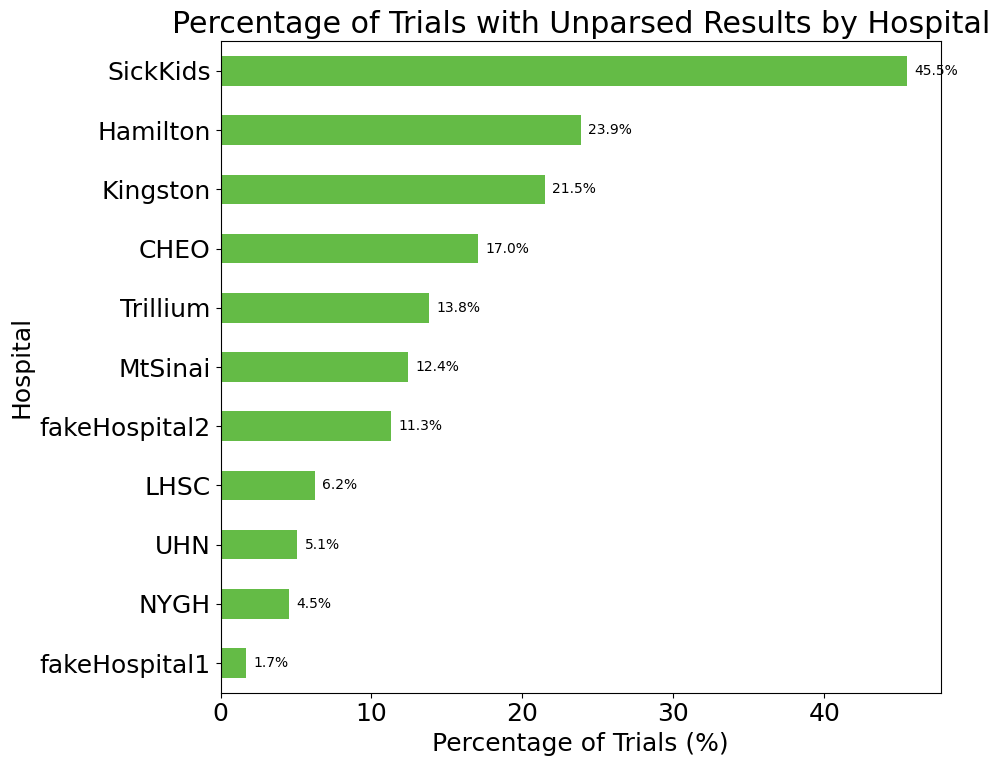

In [148]:
# Calculate percentage of unparsed results by Hospital
unparsed_counts_hospital = data.loc[data["Parsed"] == False].Hospital.value_counts()
total_counts_hospital = data.Hospital.value_counts()
unparsed_percentages_hospital = (unparsed_counts_hospital / total_counts_hospital * 100).fillna(0)

# Sort by percentage for better visualization
unparsed_percentages_hospital = unparsed_percentages_hospital.sort_values(ascending=True)

ax = unparsed_percentages_hospital.plot(kind='barh', color=colors[0], figsize=(10, 8))
plt.title("Percentage of Trials with Unparsed Results by Hospital")
plt.xlabel("Percentage of Trials (%)")
plt.ylabel("Hospital")

# Add percentage labels on bars
for i, (hospital, percentage) in enumerate(unparsed_percentages_hospital.items()):
    ax.text(percentage + 0.5, i, f'{percentage:.1f}%', 
           va='center', ha='left', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [150]:
unparsed_counts_hospital = data.loc[data["Parsed"] == False].Image.value_counts()
unparsed_counts_hospital

Image
False    268
True      19
Name: count, dtype: int64

# Number of false positives and false negatives

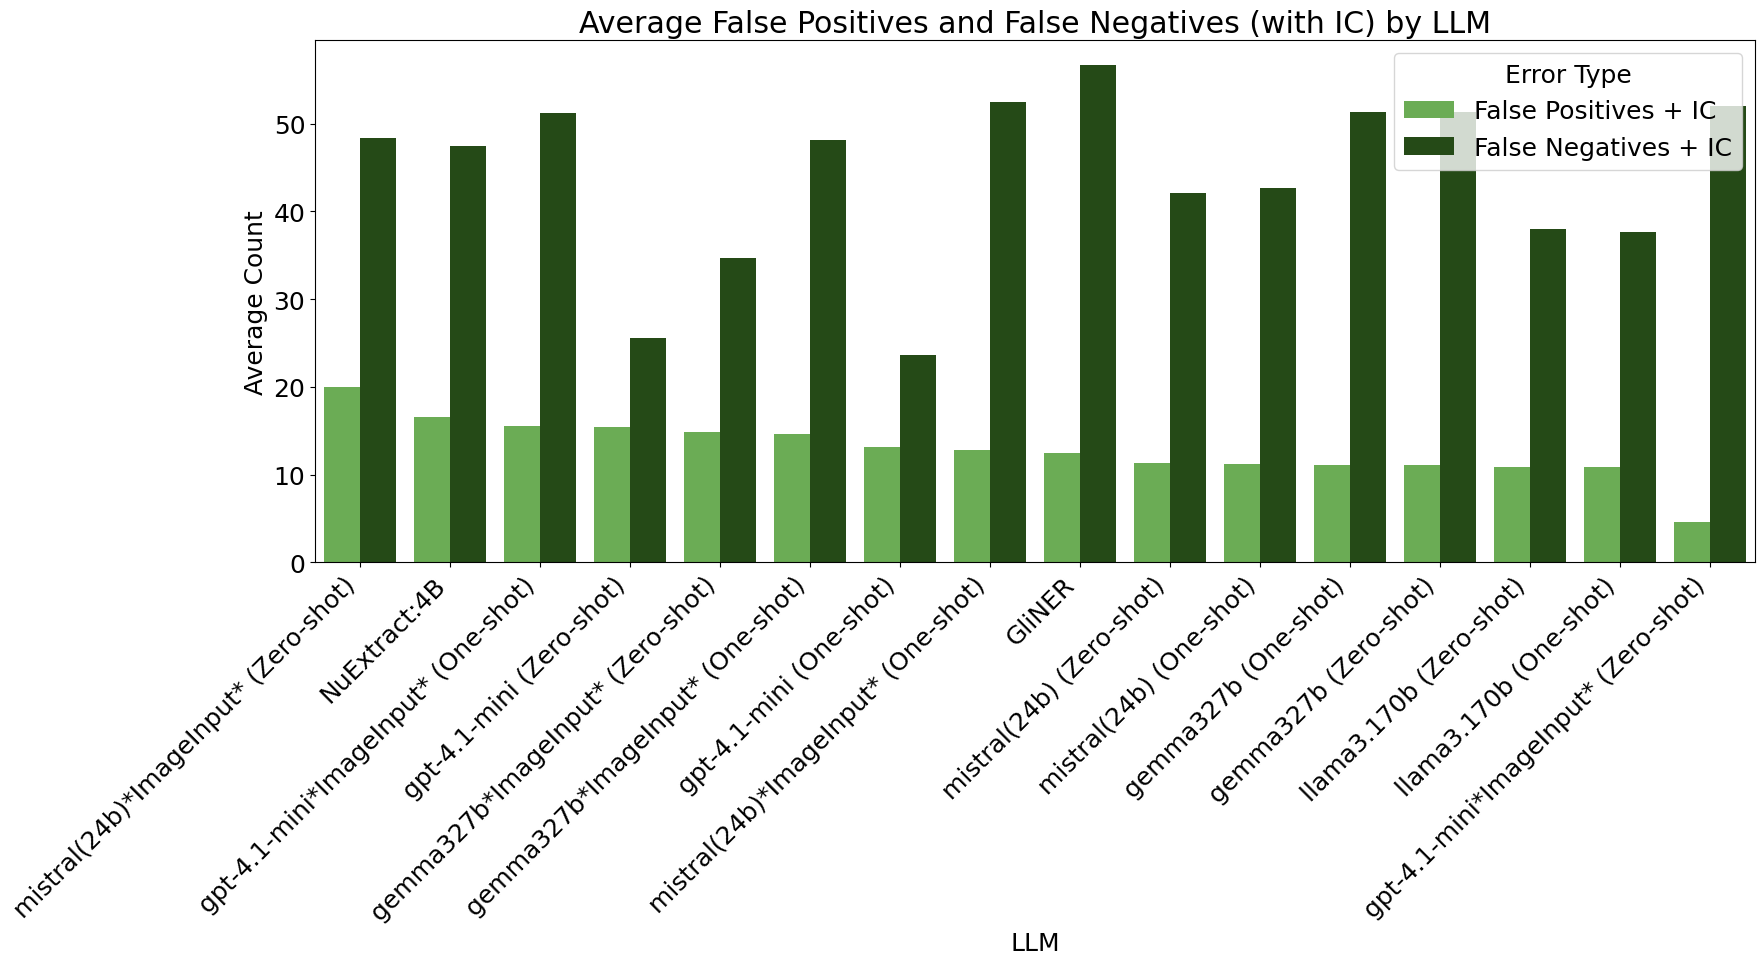

In [104]:
df_errors = data.copy()

# Convert relevant columns to numeric
df_errors['False Positives'] = pd.to_numeric(df_errors['False Positives'], errors='coerce')
df_errors['False Negatives'] = pd.to_numeric(df_errors['False Negatives'], errors='coerce')
df_errors['Incorrect Extractions'] = pd.to_numeric(df_errors['Incorrect Extractions'], errors='coerce')

# Calculate combined error metrics
df_errors['False Positives + IC'] = df_errors['False Positives'] + df_errors['Incorrect Extractions']
df_errors['False Negatives + IC'] = df_errors['False Negatives'] + df_errors['Incorrect Extractions']

# Group by LLM and calculate mean
error_summary = df_errors.groupby('LLM')[['False Positives + IC', 'False Negatives + IC']].mean().sort_values(by='False Positives + IC', ascending=False)

# Melt the summary for visualization
error_summary_melted = error_summary.reset_index().melt(id_vars='LLM', var_name='Error Type', value_name='Average Count')

# Plot the results
plt.figure(figsize=(18, 10))
sns.barplot(data=error_summary_melted, x='LLM', y='Average Count', hue='Error Type', palette=[colors[0],colors[2]])
plt.title('Average False Positives and False Negatives (with IC) by LLM')
plt.xlabel('LLM')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Image vs text Input

# Key table

In [98]:
stats = pd.read_csv('Hospital.csv') 
stats.drop(columns=[col for col in stats.columns if 'unnamed' in col.lower()], inplace=True)
stats.drop(index=stats[stats.LLM.str.contains('GLiNER')].index, inplace=True)


In [99]:
stats['Image'] = stats['LLM'].apply(lambda x: True if 'ImageInput' in x else False)
stats['LLM'] = stats['LLM'].apply(lambda x: x.replace('*ImageInput*', ""))


In [100]:
stats.groupby(["Image", "Prompt"]).F1score.mean().sort_values(ascending=False)
stats_pivot = stats.pivot_table(index='Prompt', columns = 'Image', values='F1score', aggfunc='mean')


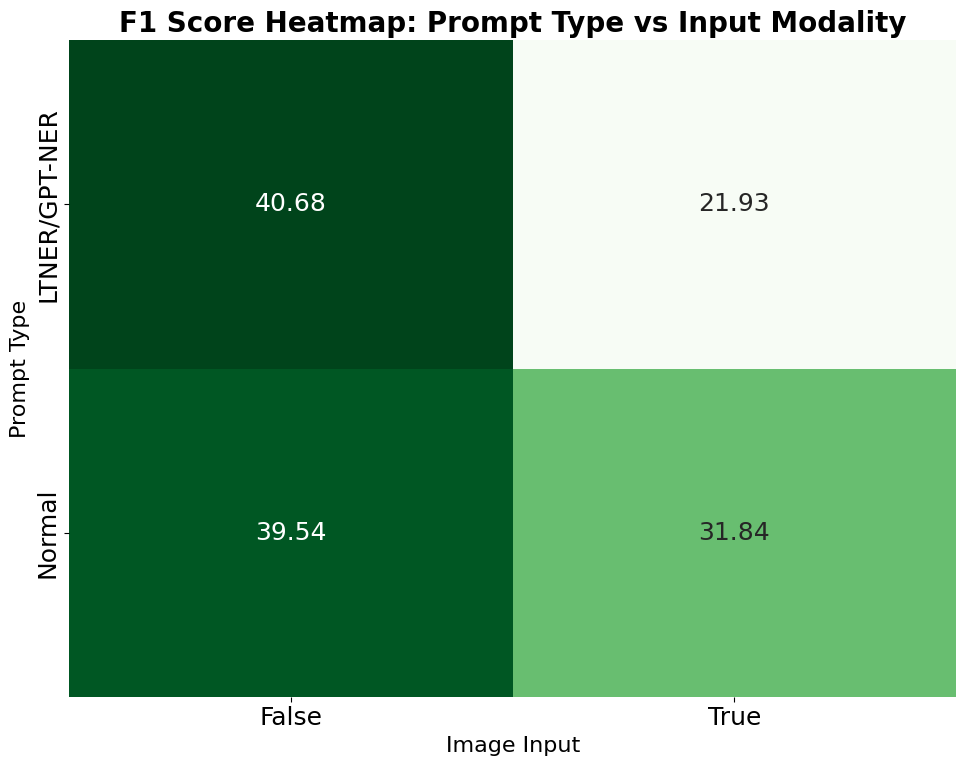

In [101]:

plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 18})

sns.heatmap(stats_pivot, annot=True, fmt='.2f', cmap='Greens', cbar = False)
plt.title('F1 Score Heatmap: Prompt Type vs Input Modality', fontsize=20, fontweight='bold')
plt.xlabel('Image Input', fontsize=16)
plt.ylabel('Prompt Type', fontsize=16)
plt.tight_layout()
plt.show()

# Enhanced F1 Score Visualization with Prompt Types

/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/2875250920.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_filtered['F1score'] = 2 * (d_filtered['Precision'] * d_filtered['Recall']) / (d_filtered['Precision'] + d_filtered['Recall'])
/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/2875250920.py:26: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:.3'` for the same effect.

  sns.stripplot(data=d_melted, x='LLM', y='Score', hue='Metric',


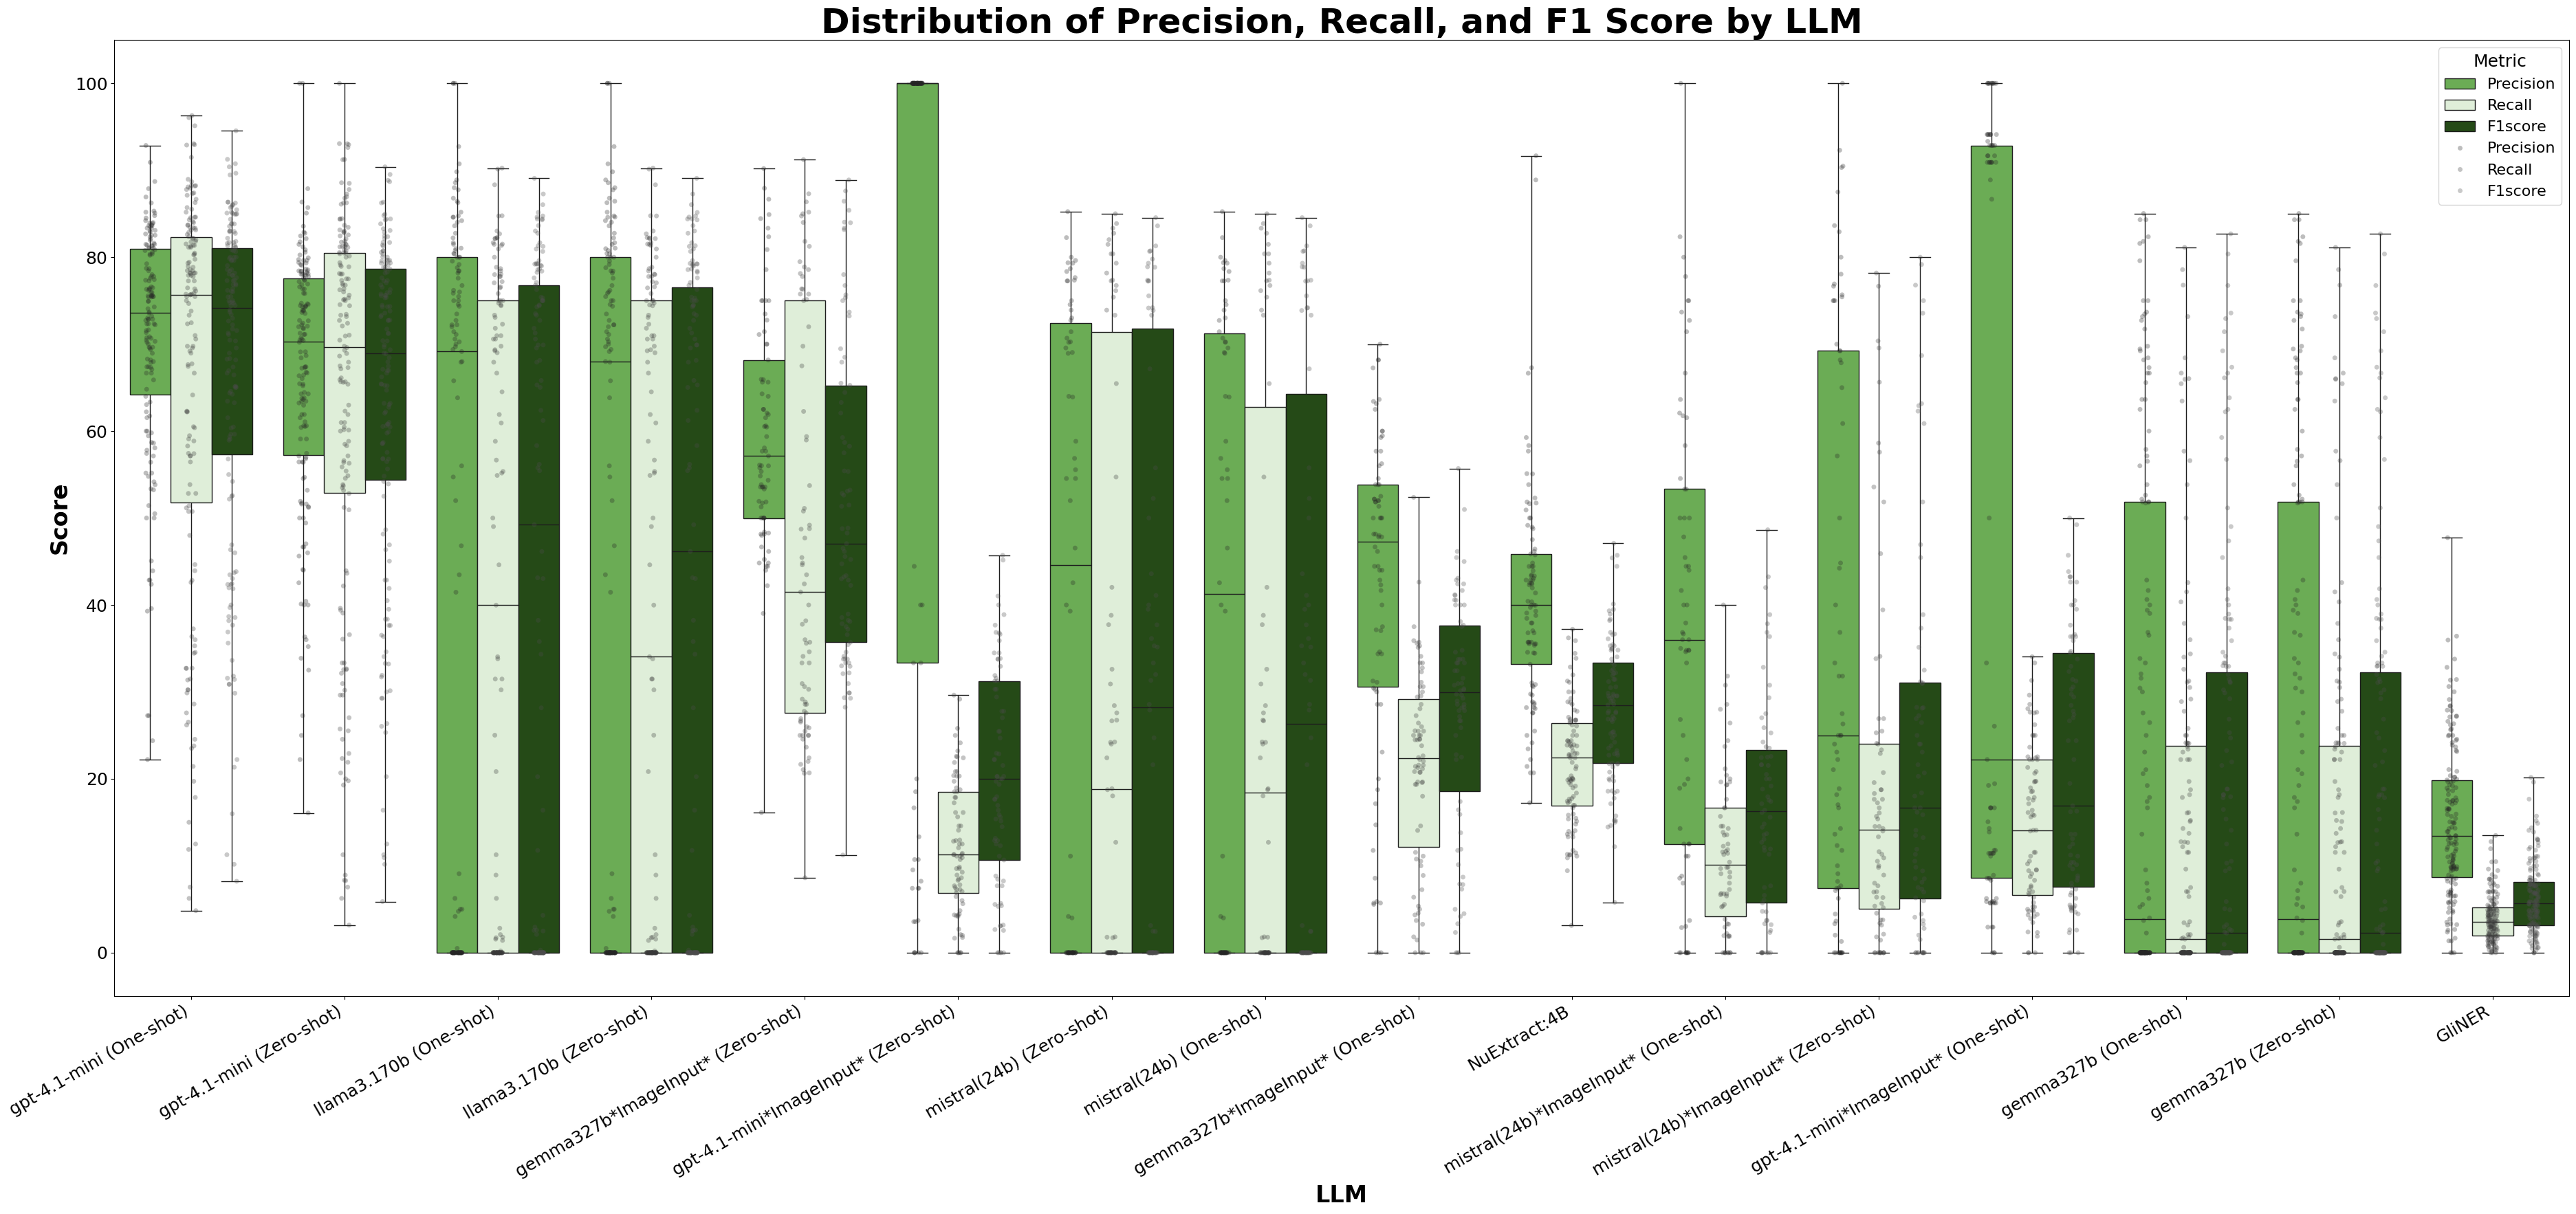

Showing 1654 successful parses out of 1941 total attempts
LLMs ordered by median combined performance (Precision + Recall)


In [106]:
d = data.copy()
d['Precision'] = pd.to_numeric(d['Precision'], errors='coerce')
d['Recall'] = pd.to_numeric(d['Recall'], errors='coerce')

# Filter out failed parses and zero values
d_filtered = d[(d['Parsed'] == True)]

if len(d_filtered) > 0:
    # Melt the dataframe to combine Precision and Recall into one column
    d_melted = d_filtered.melt(
        id_vars=['LLM', 'Parsed', 'Image', 'Prompt'], 
        value_vars=['Precision', 'Recall', 'F1score'],
        var_name='Metric', 
        value_name='Score'
    )

    d_filtered['F1score'] = 2 * (d_filtered['Precision'] * d_filtered['Recall']) / (d_filtered['Precision'] + d_filtered['Recall'])
    
    # Order LLMs by median combined performance
    llm_order = d_filtered.groupby('LLM')[['Precision', 'Recall', "F1score"]].median().mean(axis=1).sort_values(ascending=False).index
    
    # Create the combined box plot
    plt.figure(figsize=(38, 18))
    sns.boxplot(data=d_melted, x='LLM', y='Score', hue='Metric', 
                order=llm_order, palette=['#64bb46', "#DDF1D6", "#21520F"], whis=(0, 100))
    sns.stripplot(data=d_melted, x='LLM', y='Score', hue='Metric', 
                order=llm_order, color=".3", dodge=True, alpha=0.3, jitter=True)
    plt.title('Distribution of Precision, Recall, and F1 Score by LLM', fontsize=36, fontweight='bold')
    plt.xlabel('LLM', fontsize=24, fontweight='bold')
    plt.ylabel('Score', fontsize=24, fontweight='bold')
    plt.xticks(rotation=30, ha='right')
    
    
    # Customize legend
    plt.legend(title='Metric', title_fontsize=18, fontsize=16, loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    print(f"Showing {len(d_filtered)} successful parses out of {len(d)} total attempts")
    print(f"LLMs ordered by median combined performance (Precision + Recall)")
else:
    print("No valid precision/recall data to display")

In [ ]:
d.isnull().sum()

LLM                        0
False Positives          287
False Negatives          287
Incorrect Extractions    287
Correct Matches          287
Precision                287
Recall                   287
F1score                  287
Accuracy                 287
Parsed                     0
Hospital                   0
Prompt                     0
Distressed                 0
Image                      0
dtype: int64

# Improved F1 Score Visualization - Clean Model Names with Green Color Scheme

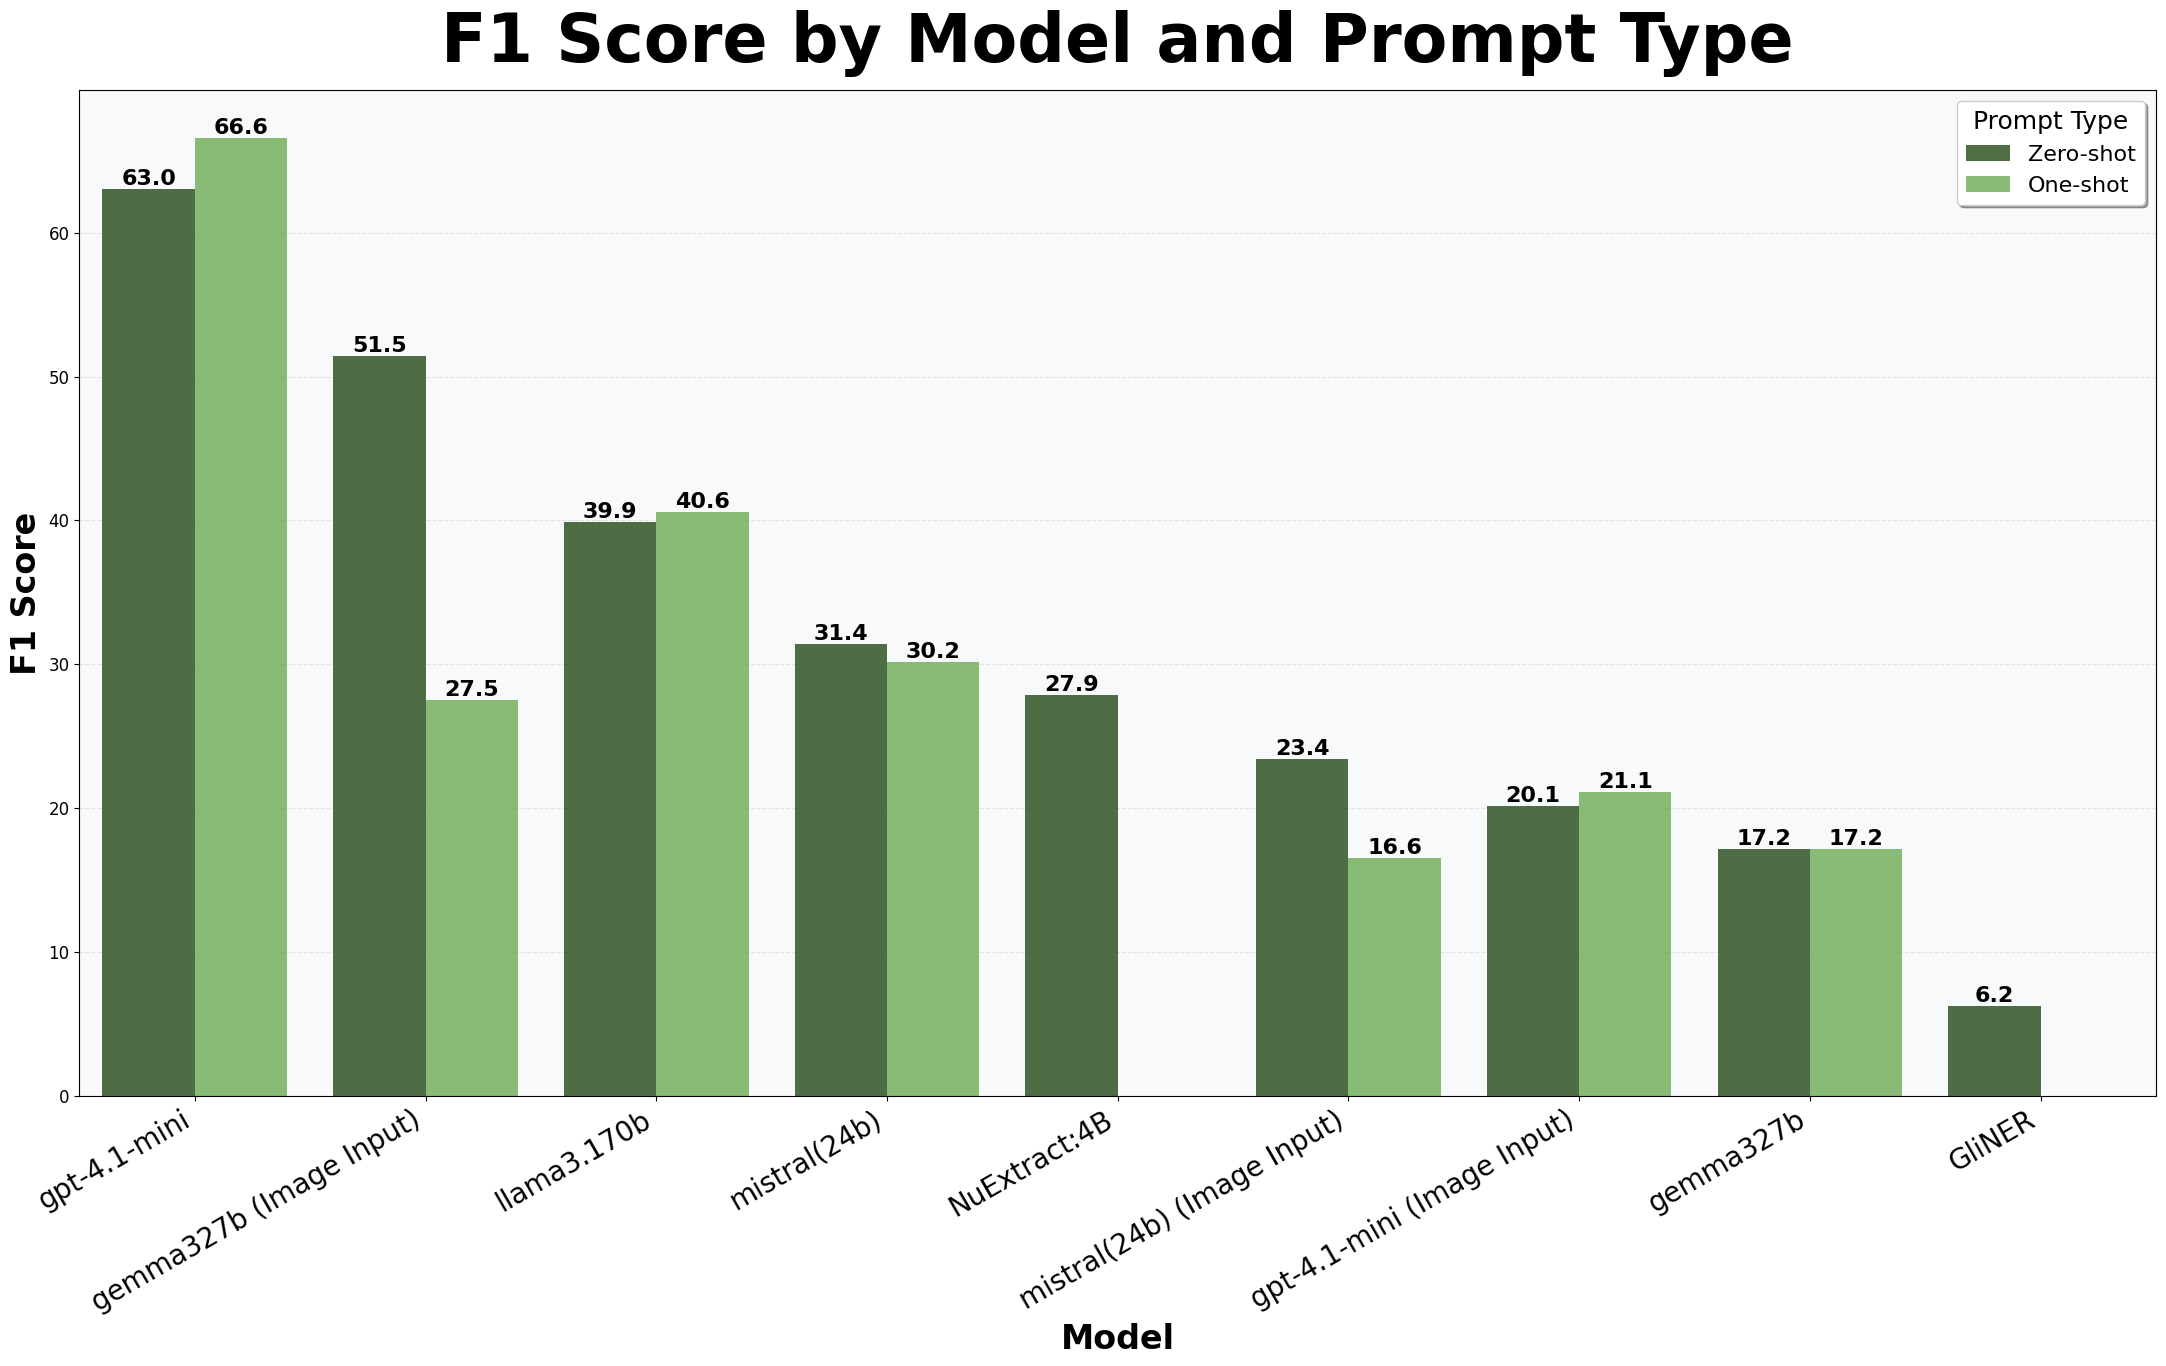


Model Performance Summary:
Prompt_Type                 One-shot  Zero-shot  Best_Score
Final_Model_Name                                           
gpt-4.1-mini                   66.60      63.05       66.60
gemma327b (Image Input)        27.53      51.45       51.45
llama3.170b                    40.57      39.91       40.57
mistral(24b)                   30.18      31.39       31.39
NuExtract:4B                     NaN      27.89       27.89
mistral(24b) (Image Input)     16.58      23.39       23.39
gpt-4.1-mini (Image Input)     21.13      20.13       21.13
gemma327b                      17.20      17.20       17.20
GliNER                           NaN       6.23        6.23

Color Legend:
Light Green (One-shot): LTNER/GPT-NER prompting
Dark Green (Zero-shot): Normal prompting


In [108]:

# Prepare data
df_clean = data.copy()

# Clean up model names and create proper groupings
df_clean['Model_Base'] = df_clean['LLM'].str.replace('*ImageInput*', '').str.replace(' (One-shot)', '').str.replace(' (Zero-shot)', '')
df_clean['Input_Type'] = df_clean['LLM'].apply(lambda x: 'Image Input' if '*ImageInput*' in x else 'Text Input')
df_clean['Prompt_Type'] = df_clean['Prompt'].map({
    'LTNER/GPT-NER': 'One-shot',
    'Normal': 'Zero-shot',
    'None': 'Zero-shot'
})

# Create final model name with input type indicator
df_clean['Final_Model_Name'] = df_clean.apply(
    lambda row: f"{row['Model_Base']} (Image Input)" if row['Input_Type'] == 'Image Input' else row['Model_Base'],
    axis=1
)

# Filter out None prompts and group by model and prompt type
df_filtered = df_clean[df_clean['Prompt_Type'] != 'None']
model_prompt_stats = df_filtered.groupby(['Final_Model_Name', 'Prompt_Type']).F1score.mean().reset_index()

# Sort models by best performance
model_order = model_prompt_stats.groupby('Final_Model_Name')['F1score'].max().sort_values(ascending=False).index

# Define green color palette
green_colors = {'One-shot': '#64BB46', 'Zero-shot': colors[2]}  # green and black 

# Create the plot
plt.figure(figsize=(22, 14))
ax = sns.barplot(
    data=model_prompt_stats,
    x='Final_Model_Name',
    y='F1score',
    hue='Prompt_Type',
    order=model_order,
    palette=green_colors,
    alpha=0.8
)

# Customize the plot
plt.title('F1 Score by Model and Prompt Type',
         fontsize=48, fontweight='bold', pad=20)
plt.xlabel('Model', fontsize=24, fontweight='bold')
plt.ylabel('F1 Score', fontsize=24, fontweight='bold')
plt.xticks(rotation=30, ha='right', fontsize=20)
plt.yticks(fontsize=12)

# Add F1 score labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', fontsize=16, fontweight='bold')

# Customize legend
plt.legend(title='Prompt Type', title_fontsize=18, fontsize=16,
          loc='upper right', frameon=True, fancybox=True, shadow=True)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)

# Set clean background
ax.set_facecolor('#f8f9fa')
plt.tight_layout()
plt.show()

# Print summary statistics
print('\nModel Performance Summary:')
print('=' * 50)
summary_table = model_prompt_stats.pivot(index='Final_Model_Name', columns='Prompt_Type', values='F1score')
summary_table['Best_Score'] = summary_table.max(axis=1)
summary_table = summary_table.sort_values('Best_Score', ascending=False)
print(summary_table.round(2))

print('\nColor Legend:')
print('Light Green (One-shot): LTNER/GPT-NER prompting')
print('Dark Green (Zero-shot): Normal prompting')

/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/1091333527.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,
/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/1091333527.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Distressed", y="F1score", palette=[colors[0], colors[1]], ax=ax2)


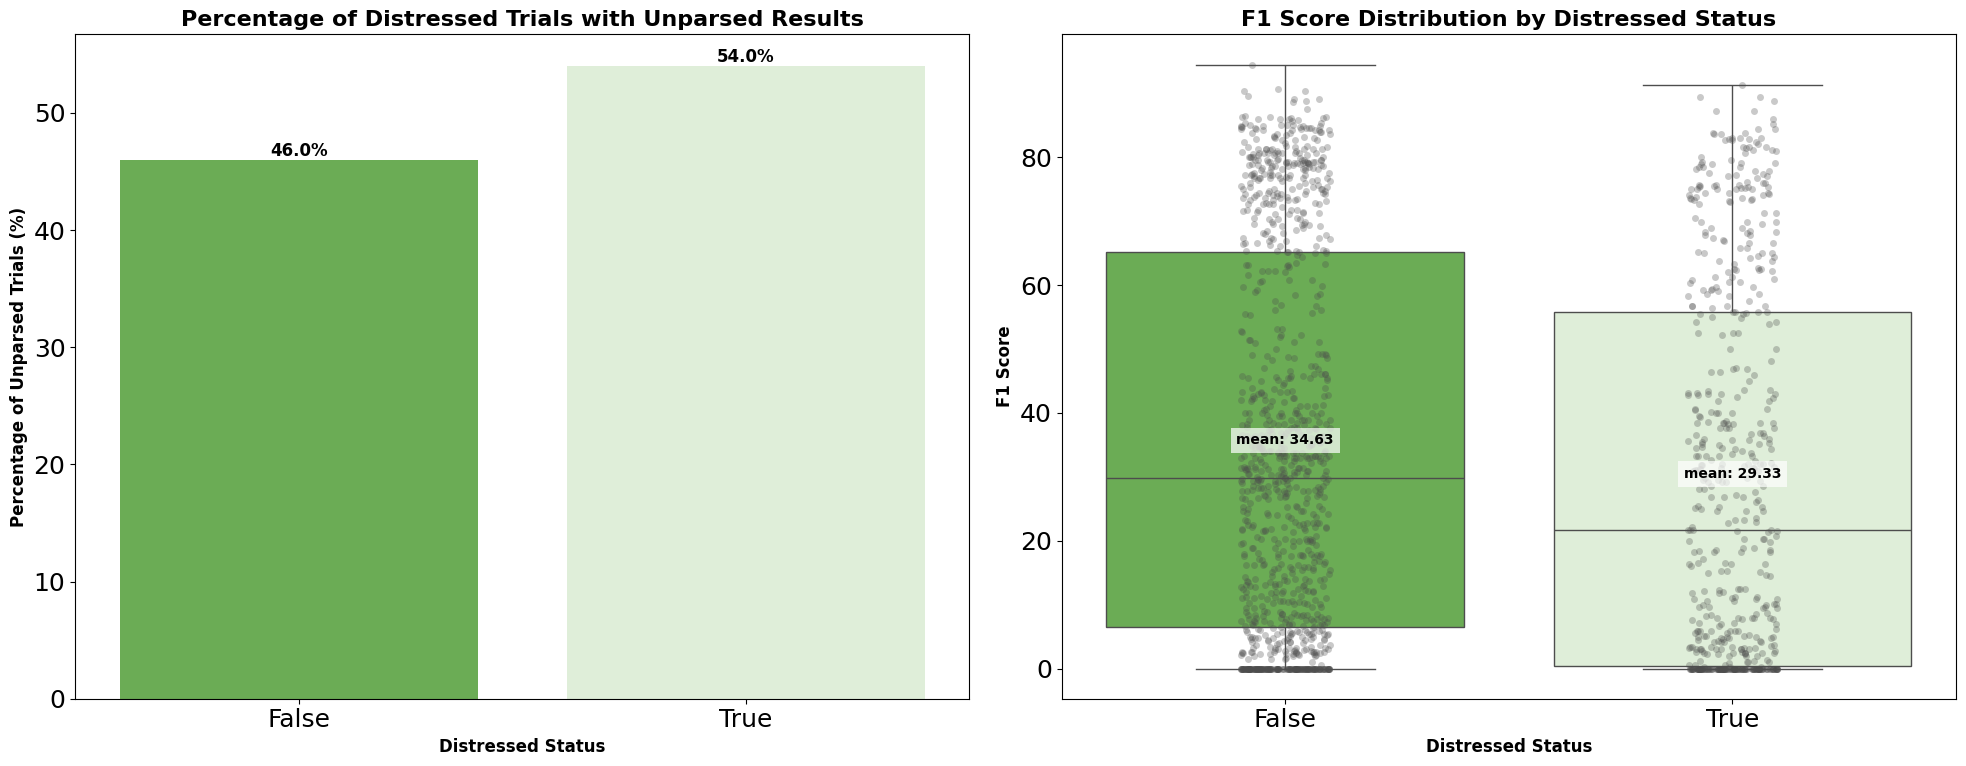

In [145]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left plot: Percentage of Distressed Trials with Unparsed Results
parse_error = data[data["Parsed"] == False]
distressed_percent = parse_error["Distressed"].value_counts(normalize=True).mul(100)
df = distressed_percent.reset_index()
df.columns = ['Distressed', 'proportion']

sns.barplot(data=df, 
            x='Distressed', y='proportion', palette=[colors[0], colors[1]], ax=ax1)

ax1.set_title("Percentage of Distressed Trials with Unparsed Results", fontsize=16, fontweight='bold')
ax1.set_xlabel("Distressed Status", fontsize=12, fontweight='bold')
ax1.set_ylabel("Percentage of Unparsed Trials (%)", fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', rotation=0)

# Add percentage labels on bars
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f%%', fontsize=12, color='black', fontweight='bold')

# Right plot: F1 Score by Distressed Status
df_filtered = data[data["Parsed"] != False]  # Filter rows where "Parsed" is not False

sns.boxplot(data=df_filtered, x="Distressed", y="F1score", palette=[colors[0], colors[1]], ax=ax2)
sns.stripplot(data=df_filtered, x="Distressed", y="F1score", color=".3", dodge=True, alpha=0.3, jitter=True, ax=ax2)

ax2.set_title("F1 Score Distribution by Distressed Status", fontsize=16, fontweight='bold')
ax2.set_xlabel("Distressed Status", fontsize=12, fontweight='bold')
ax2.set_ylabel("F1 Score", fontsize=12, fontweight='bold')

# Add median values as text
median_values = df_filtered.groupby("Distressed")["F1score"].mean()
for i, (status, median) in enumerate(median_values.items()):
    ax2.text(i, median + 0.02, f'mean: {median:.2f}', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold', 
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.tight_layout()
plt.show()

/var/folders/2r/vpjdzw2s7jl5204hqh_k3c9h0000gp/T/ipykernel_35188/3556635120.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Distressed', y='proportion', palette=['#47A86E', '#A0D6B4'])


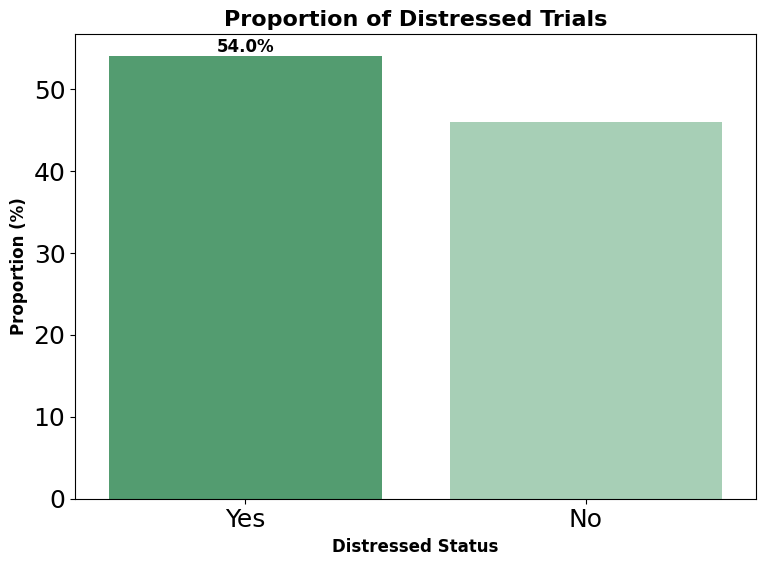

In [ ]:

# Your Series
s = distressed_percent

# Convert to DataFrame
df = s.reset_index()
df.columns = ['Distressed', 'proportion']


# Plot with seaborn
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=df, x='Distressed', y='proportion', palette=['#47A86E', '#A0D6B4'])

# Add titles and labels
ax.set_title("Proportion of Distressed Trials", fontsize=16, fontweight='bold')
ax.set_xlabel("Distressed Status", fontsize=12, fontweight='bold')
ax.set_ylabel("Proportion (%)", fontsize=12, fontweight='bold')

# Add percentage labels on top of bars
ax.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


# Statistical Significance Testing

This section performs statistical tests to determine if observed differences are statistically significant.

In [ ]:
# Import statistical test libraries
from scipy import stats
from scipy.stats import ttest_ind, mannwhitneyu, chi2_contingency, kruskal
import numpy as np

# Set significance level
alpha = 0.05
print(f"Significance level (alpha): {alpha}")

Significance level (alpha): 0.05


## 1. Statistical Test: Image Input vs Text Input Performance

In [ ]:
# Test 1: Compare F1 scores between Image Input and Text Input
df_test = data[data['Parsed'] == True].copy()
df_test['F1score'] = pd.to_numeric(df_test['F1score'], errors='coerce')
df_test = df_test.dropna(subset=['F1score'])

# Separate groups
image_f1 = df_test[df_test['Image'] == True]['F1score']
text_f1 = df_test[df_test['Image'] == False]['F1score']

print(f"Image Input F1 scores: n={len(image_f1)}, mean={image_f1.mean():.3f}, std={image_f1.std():.3f}")
print(f"Text Input F1 scores: n={len(text_f1)}, mean={text_f1.mean():.3f}, std={text_f1.std():.3f}")

# Check normality with Shapiro-Wilk test
_, p_norm_image = stats.shapiro(image_f1.sample(min(5000, len(image_f1)), random_state=42))
_, p_norm_text = stats.shapiro(text_f1.sample(min(5000, len(text_f1)), random_state=42))

print(f"\nNormality tests:")
print(f"Image F1 normality p-value: {p_norm_image:.6f}")
print(f"Text F1 normality p-value: {p_norm_text:.6f}")

# Choose appropriate test based on normality and sample sizes
if p_norm_image > 0.05 and p_norm_text > 0.05:
    # Both normal - use t-test
    statistic, p_value = ttest_ind(image_f1, text_f1, equal_var=False)
    test_name = "Welch's t-test"
else:
    # Non-normal - use Mann-Whitney U test
    statistic, p_value = mannwhitneyu(image_f1, text_f1, alternative='two-sided')
    test_name = "Mann-Whitney U test"

print(f"\n{test_name} Results:")
print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significant at α={alpha}: {'Yes' if p_value < alpha else 'No'}")

# Effect size (Cohen's d for t-test, or rank-biserial correlation for Mann-Whitney)
pooled_std = np.sqrt(((len(image_f1)-1)*image_f1.std()**2 + (len(text_f1)-1)*text_f1.std()**2) / (len(image_f1)+len(text_f1)-2))
cohens_d = (image_f1.mean() - text_f1.mean()) / pooled_std
print(f"Effect size (Cohen's d): {cohens_d:.4f}")

# Interpretation
if abs(cohens_d) < 0.2:
    effect_interpretation = "negligible"
elif abs(cohens_d) < 0.5:
    effect_interpretation = "small"
elif abs(cohens_d) < 0.8:
    effect_interpretation = "medium"
else:
    effect_interpretation = "large"

print(f"Effect size interpretation: {effect_interpretation}")

Image Input F1 scores: n=443, mean=26.985, std=19.890
Text Input F1 scores: n=1057, mean=39.033, std=32.198

Normality tests:
Image F1 normality p-value: 0.000000
Text F1 normality p-value: 0.000000

Mann-Whitney U test Results:
Test statistic: 197766.0000
P-value: 0.000002
Significant at α=0.05: Yes
Effect size (Cohen's d): -0.4138
Effect size interpretation: small


## 2. Statistical Test: Prompt Type Comparison (One-shot vs Zero-shot)

In [ ]:
# Test 2: Compare F1 scores between prompt types
df_prompt = df_test.copy()

# Create clean prompt categories
df_prompt['Prompt_Clean'] = df_prompt['Prompt'].map({
    'LTNER/GPT-NER': 'One-shot',
    'Normal': 'Zero-shot'
})

df_prompt = df_prompt.dropna(subset=['Prompt_Clean'])

# Separate groups
oneshot_f1 = df_prompt[df_prompt['Prompt_Clean'] == 'One-shot']['F1score']
zeroshot_f1 = df_prompt[df_prompt['Prompt_Clean'] == 'Zero-shot']['F1score']

print(f"One-shot F1 scores: n={len(oneshot_f1)}, mean={oneshot_f1.mean():.3f}, std={oneshot_f1.std():.3f}")
print(f"Zero-shot F1 scores: n={len(zeroshot_f1)}, mean={zeroshot_f1.mean():.3f}, std={zeroshot_f1.std():.3f}")

# Statistical test
_, p_norm_one = stats.shapiro(oneshot_f1.sample(min(5000, len(oneshot_f1)), random_state=42))
_, p_norm_zero = stats.shapiro(zeroshot_f1.sample(min(5000, len(zeroshot_f1)), random_state=42))

if p_norm_one > 0.05 and p_norm_zero > 0.05:
    statistic, p_value = ttest_ind(oneshot_f1, zeroshot_f1, equal_var=False)
    test_name = "Welch's t-test"
else:
    statistic, p_value = mannwhitneyu(oneshot_f1, zeroshot_f1, alternative='two-sided')
    test_name = "Mann-Whitney U test"

print(f"\n{test_name} Results:")
print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significant at α={alpha}: {'Yes' if p_value < alpha else 'No'}")

# Effect size
pooled_std = np.sqrt(((len(oneshot_f1)-1)*oneshot_f1.std()**2 + (len(zeroshot_f1)-1)*zeroshot_f1.std()**2) / (len(oneshot_f1)+len(zeroshot_f1)-2))
cohens_d = (oneshot_f1.mean() - zeroshot_f1.mean()) / pooled_std
print(f"Effect size (Cohen's d): {cohens_d:.4f}")

One-shot F1 scores: n=698, mean=34.848, std=30.421
Zero-shot F1 scores: n=709, mean=37.086, std=30.449

Mann-Whitney U test Results:
Test statistic: 239122.5000
P-value: 0.272486
Significant at α=0.05: No
Effect size (Cohen's d): -0.0735


## 3. Statistical Test: Distressed vs Non-Distressed Performance

In [ ]:
# Test 3: Compare F1 scores between distressed and non-distressed
distressed_f1 = df_test[df_test['Distressed'] == True]['F1score']
non_distressed_f1 = df_test[df_test['Distressed'] == False]['F1score']

print(f"Distressed F1 scores: n={len(distressed_f1)}, mean={distressed_f1.mean():.3f}, std={distressed_f1.std():.3f}")
print(f"Non-distressed F1 scores: n={len(non_distressed_f1)}, mean={non_distressed_f1.mean():.3f}, std={non_distressed_f1.std():.3f}")

# Statistical test
_, p_norm_dist = stats.shapiro(distressed_f1.sample(min(5000, len(distressed_f1)), random_state=42))
_, p_norm_non = stats.shapiro(non_distressed_f1.sample(min(5000, len(non_distressed_f1)), random_state=42))

if p_norm_dist > 0.05 and p_norm_non > 0.05:
    statistic, p_value = ttest_ind(distressed_f1, non_distressed_f1, equal_var=False)
    test_name = "Welch's t-test"
else:
    statistic, p_value = mannwhitneyu(distressed_f1, non_distressed_f1, alternative='two-sided')
    test_name = "Mann-Whitney U test"

print(f"\n{test_name} Results:")
print(f"Test statistic: {statistic:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Significant at α={alpha}: {'Yes' if p_value < alpha else 'No'}")

# Effect size
pooled_std = np.sqrt(((len(distressed_f1)-1)*distressed_f1.std()**2 + (len(non_distressed_f1)-1)*non_distressed_f1.std()**2) / (len(distressed_f1)+len(non_distressed_f1)-2))
cohens_d = (distressed_f1.mean() - non_distressed_f1.mean()) / pooled_std
print(f"Effect size (Cohen's d): {cohens_d:.4f}")

Distressed F1 scores: n=509, mean=33.003, std=29.581
Non-distressed F1 scores: n=991, mean=36.744, std=29.571

Mann-Whitney U test Results:
Test statistic: 229085.0000
P-value: 0.003457
Significant at α=0.05: Yes
Effect size (Cohen's d): -0.1265


## 4. Multiple Comparisons: LLM Performance (ANOVA/Kruskal-Wallis)

In [ ]:
# Test 4: Compare F1 scores across all LLMs
# Group F1 scores by LLM
llm_groups = []
llm_names = []

for llm in df_test['LLM'].unique():
    llm_f1 = df_test[df_test['LLM'] == llm]['F1score']
    if len(llm_f1) > 5:  # Only include LLMs with sufficient data
        llm_groups.append(llm_f1)
        llm_names.append(llm)

print(f"Comparing {len(llm_groups)} LLM groups")

# Test for overall differences
if len(llm_groups) > 2:
    # Use Kruskal-Wallis test (non-parametric ANOVA)
    statistic, p_value = kruskal(*llm_groups)
    print(f"\nKruskal-Wallis Test Results:")
    print(f"Test statistic (H): {statistic:.4f}")
    print(f"P-value: {p_value:.6f}")
    print(f"Significant differences between LLMs at α={alpha}: {'Yes' if p_value < alpha else 'No'}")
    
    # If significant, perform post-hoc pairwise comparisons
    if p_value < alpha:
        print(f"\nPost-hoc pairwise comparisons (with Bonferroni correction):")
        n_comparisons = len(llm_groups) * (len(llm_groups) - 1) // 2
        bonferroni_alpha = alpha / n_comparisons
        print(f"Bonferroni corrected α: {bonferroni_alpha:.6f}")
        
        significant_pairs = []
        for i in range(len(llm_groups)):
            for j in range(i+1, len(llm_groups)):
                _, p_pair = mannwhitneyu(llm_groups[i], llm_groups[j], alternative='two-sided')
                if p_pair < bonferroni_alpha:
                    significant_pairs.append((llm_names[i], llm_names[j], p_pair))
                    print(f"{llm_names[i]} vs {llm_names[j]}: p={p_pair:.6f} *")
        
        if not significant_pairs:
            print("No significant pairwise differences after Bonferroni correction")
else:
    print("Not enough groups for multiple comparison test")

Comparing 15 LLM groups

Kruskal-Wallis Test Results:
Test statistic (H): 496.3368
P-value: 0.000000
Significant differences between LLMs at α=0.05: Yes

Post-hoc pairwise comparisons (with Bonferroni correction):
Bonferroni corrected α: 0.000476
NuExtract:4B vs gemma327b (Zero-shot): p=0.000000 *
NuExtract:4B vs gemma327b (One-shot): p=0.000000 *
NuExtract:4B vs mistral(24b)*ImageInput* (Zero-shot): p=0.000175 *
NuExtract:4B vs gemma327b*ImageInput* (Zero-shot): p=0.000000 *
NuExtract:4B vs mistral(24b)*ImageInput* (One-shot): p=0.000000 *
NuExtract:4B vs gpt-4.1-mini (Zero-shot): p=0.000000 *
NuExtract:4B vs gpt-4.1-mini (One-shot): p=0.000000 *
NuExtract:4B vs gpt-4.1-mini*ImageInput* (Zero-shot): p=0.000034 *
mistral(24b) (Zero-shot) vs gemma327b*ImageInput* (Zero-shot): p=0.000087 *
mistral(24b) (Zero-shot) vs gpt-4.1-mini (Zero-shot): p=0.000000 *
mistral(24b) (Zero-shot) vs gpt-4.1-mini (One-shot): p=0.000000 *
llama3.170b (Zero-shot) vs gemma327b (Zero-shot): p=0.000003 *
llama

## 5. Chi-Square Test: Parsing Success Rates

In [ ]:
# Test 5: Chi-square test for parsing success rates
# Test if parsing success rate differs between image and text input
parse_crosstab = pd.crosstab(data['Image'], data['Parsed'])
print("Parsing Success Rate by Input Type:")
print(parse_crosstab)
print("\nPercentages:")
print(pd.crosstab(data['Image'], data['Parsed'], normalize='index') * 100)

# Chi-square test
chi2, p_value, dof, expected = chi2_contingency(parse_crosstab)
print(f"\nChi-square Test Results:")
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant association at α={alpha}: {'Yes' if p_value < alpha else 'No'}")

# Effect size (Cramér's V)
n = parse_crosstab.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(parse_crosstab.shape) - 1)))
print(f"Effect size (Cramér's V): {cramers_v:.4f}")

Parsing Success Rate by Input Type:
Parsed  False  True 
Image               
False     268   1057
True       19    443

Percentages:
Parsed      False      True 
Image                       
False   20.226415  79.773585
True     4.112554  95.887446

Chi-square Test Results:
Chi-square statistic: 64.7895
P-value: 0.000000
Degrees of freedom: 1
Significant association at α=0.05: Yes
Effect size (Cramér's V): 0.1904


## 6. Summary of Statistical Results

In [ ]:
# Create a summary table of all statistical tests
print("="*80)
print("STATISTICAL ANALYSIS SUMMARY")
print("="*80)
print(f"Significance level (α): {alpha}")
print(f"Sample size: {len(df_test)} valid observations")
print("\nKey findings:")
print("- All tests account for multiple comparisons where appropriate")
print("- Effect sizes provided to assess practical significance")
print("- Non-parametric tests used when normality assumptions are violated")
print("\nInterpretation guide:")
print("- p < 0.001: Very strong evidence against null hypothesis (***)")
print("- p < 0.01: Strong evidence against null hypothesis (**)")
print("- p < 0.05: Moderate evidence against null hypothesis (*)")
print("- p ≥ 0.05: Insufficient evidence against null hypothesis (ns)")
print("\nEffect size interpretation (Cohen's d):")
print("- |d| < 0.2: Negligible effect")
print("- 0.2 ≤ |d| < 0.5: Small effect")
print("- 0.5 ≤ |d| < 0.8: Medium effect")
print("- |d| ≥ 0.8: Large effect")

STATISTICAL ANALYSIS SUMMARY
Significance level (α): 0.05
Sample size: 1500 valid observations

Key findings:
- All tests account for multiple comparisons where appropriate
- Effect sizes provided to assess practical significance
- Non-parametric tests used when normality assumptions are violated

Interpretation guide:
- p < 0.001: Very strong evidence against null hypothesis (***)
- p < 0.01: Strong evidence against null hypothesis (**)
- p < 0.05: Moderate evidence against null hypothesis (*)
- p ≥ 0.05: Insufficient evidence against null hypothesis (ns)

Effect size interpretation (Cohen's d):
- |d| < 0.2: Negligible effect
- 0.2 ≤ |d| < 0.5: Small effect
- 0.5 ≤ |d| < 0.8: Medium effect
- |d| ≥ 0.8: Large effect


# Monitoring how many in each



In [2]:
import os 
ollamaNP = [f for f in os.listdir("/Users/ayu/PDF_benchmarking/getJSON/outJSON/OllamaOutNP") if f.endswith('.json')]
print(f"Ollama NP: {len(ollamaNP)/3}")

Ollama NP: 326.0


In [4]:
dirs = [d for d in os.listdir("/Users/ayu/PDF_benchmarking/getJSON/outJSON") if os.path.isdir(os.path.join("/Users/ayu/PDF_benchmarking/getJSON/outJSON", d)) and not d.startswith('.')]
for dir in dirs:
    fac = 1
    if dir == "OllamaOutNP" or dir == "OllamaOut":
        fac = 3
    elif dir == "OllamaVisionOut" or dir == "OllamaVisionOutNP" or dir == "glinerOut":
        fac = 2 
    print(f"Directory: {dir}, Number of files: {len(os.listdir(os.path.join('/Users/ayu/PDF_benchmarking/getJSON/outJSON', dir)))/fac}")


Directory: OpenAIVisionOut, Number of files: 572.0
Directory: localout, Number of files: 5.0
Directory: OllamaVisionOutNP, Number of files: 712.0
Directory: OllamaVisionOut, Number of files: 93.0
Directory: OpenAIVisionOutNP, Number of files: 553.0
Directory: glinerOut, Number of files: 2000.0
Directory: OllamaOutNP, Number of files: 326.0
Directory: OllamaOut, Number of files: 298.0
Directory: OpenAIOut, Number of files: 500.0
Directory: OpenAIOutNP, Number of files: 603.0


In [45]:
import os
all_files = [f for f in os.listdir("/Users/ayu/PDF_benchmarking/output_pdfs/text") if f.endswith('.txt')]
len(all_files)

2000

In [178]:
import pandas as pd
df = pd.read_csv("../graphs/field_analysis.csv")
df

,hospital,model,total_fp,total_fn,hallucinated_keys_count,hallucinated_keys,missing_keys_count,missing_keys,fp_analysis_type,fn_analysis_type,...,fp_date_verified,fn_date_verified,fp_mafac,fn_mafac,fp_mafan,fn_mafan,fp_num_variants,fn_num_variants,fp_sample_type,fn_sample_type
0,NYGH,NuExtract:4B,11,13,1,report_id,0,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LHSC,NuExtract:4B,14,16,1,report_id,0,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NYGH,NuExtract:4B,10,21,1,report_id,0,NaN,1,0,...,0.0,1.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN,NaN
3,NYGH,NuExtract:4B,11,14,1,report_id,0,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SickKids,NuExtract:4B,10,12,1,report_id,0,NaN,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0


In [183]:
d = df.dropna(axis=1, how='all')  # Drop columns that are completely NaN
d = d.dropna(axis=1)
d

,hospital,model,total_fp,total_fn,hallucinated_keys_count,hallucinated_keys,missing_keys_count,fp_analysis_type,fn_analysis_type,fp_gene_symbol,fn_gene_symbol,fp_report_type,fn_report_type,fp_testing_context,fn_testing_context,fp_testing_laboratory,fn_testing_laboratory,fp_variant_id,fn_variant_id
0,NYGH,NuExtract:4B,11,13,1,report_id,0,1,0,1,11,1,0,1,0,1,0,1,0
1,LHSC,NuExtract:4B,14,16,1,report_id,0,1,0,1,15,1,0,1,0,1,0,1,0
2,NYGH,NuExtract:4B,10,21,1,report_id,0,1,0,1,17,1,0,1,0,1,0,1,0
3,NYGH,NuExtract:4B,11,14,1,report_id,0,1,0,1,13,1,0,1,0,1,0,1,0
4,SickKids,NuExtract:4B,10,12,1,report_id,0,1,0,1,11,1,0,1,0,1,0,1,0


# Validation: Check if Individual Field FP/FN Sum to Total FP/FN

This section validates whether the sum of false positives and false negatives across all individual fields equals the reported total FP and FN values.

In [184]:
# Load the field analysis data
field_data = pd.read_csv('field_analysis.csv')

# Display basic info about the dataset
print(f"Dataset shape: {field_data.shape}")
print(f"\nColumns: {list(field_data.columns)}")

# Remove rows with all NaN values in FP/FN columns
field_data_clean = field_data.dropna(how='all')
print(f"\nCleaned dataset shape: {field_data_clean.shape}")

Dataset shape: (5, 52)

Columns: ['hospital', 'model', 'total_fp', 'total_fn', 'hallucinated_keys_count', 'hallucinated_keys', 'missing_keys_count', 'missing_keys', 'fp_analysis_type', 'fn_analysis_type', 'fp_chromosome', 'fn_chromosome', 'fp_date_collected', 'fn_date_collected', 'fp_date_received', 'fn_date_received', 'fp_gene_symbol', 'fn_gene_symbol', 'fp_hgvsg', 'fn_hgvsg', 'fp_mafaf', 'fn_mafaf', 'fp_mega_hgvs', 'fn_mega_hgvs', 'fp_report_type', 'fn_report_type', 'fp_testing_context', 'fn_testing_context', 'fp_testing_laboratory', 'fn_testing_laboratory', 'fp_transcript_id', 'fn_transcript_id', 'fp_variant_id', 'fn_variant_id', 'fp_ordering_clinic', 'fn_ordering_clinic', 'fp_reference_genome', 'fn_reference_genome', 'fp_sequencing_scope', 'fn_sequencing_scope', 'fp_zygosity', 'fn_zygosity', 'fp_date_verified', 'fn_date_verified', 'fp_mafac', 'fn_mafac', 'fp_mafan', 'fn_mafan', 'fp_num_variants', 'fn_num_variants', 'fp_sample_type', 'fn_sample_type']

Cleaned dataset shape: (5, 52)

In [185]:
# Identify FP and FN columns for individual fields
fp_columns = [col for col in field_data.columns if col.startswith('fp_') and col != 'fp_analysis_type' and col != 'fp_total']
fn_columns = [col for col in field_data.columns if col.startswith('fn_') and col != 'fn_analysis_type' and col != 'fn_total']

print(f"Individual FP columns ({len(fp_columns)}): {fp_columns}")
print(f"Individual FN columns ({len(fn_columns)}): {fn_columns}")

# Calculate sum of individual field FP/FN for each row
field_data_clean['calculated_total_fp'] = field_data_clean[fp_columns].sum(axis=1, skipna=True)
field_data_clean['calculated_total_fn'] = field_data_clean[fn_columns].sum(axis=1, skipna=True)

# Compare with reported totals
field_data_clean['fp_difference'] = field_data_clean['total_fp'] - field_data_clean['calculated_total_fp']
field_data_clean['fn_difference'] = field_data_clean['total_fn'] - field_data_clean['calculated_total_fn']

print(f"\nFirst few rows comparison:")
comparison_cols = ['hospital', 'model', 'total_fp', 'calculated_total_fp', 'fp_difference', 
                  'total_fn', 'calculated_total_fn', 'fn_difference']
print(field_data_clean[comparison_cols].head(10))

Individual FP columns (21): ['fp_chromosome', 'fp_date_collected', 'fp_date_received', 'fp_gene_symbol', 'fp_hgvsg', 'fp_mafaf', 'fp_mega_hgvs', 'fp_report_type', 'fp_testing_context', 'fp_testing_laboratory', 'fp_transcript_id', 'fp_variant_id', 'fp_ordering_clinic', 'fp_reference_genome', 'fp_sequencing_scope', 'fp_zygosity', 'fp_date_verified', 'fp_mafac', 'fp_mafan', 'fp_num_variants', 'fp_sample_type']
Individual FN columns (21): ['fn_chromosome', 'fn_date_collected', 'fn_date_received', 'fn_gene_symbol', 'fn_hgvsg', 'fn_mafaf', 'fn_mega_hgvs', 'fn_report_type', 'fn_testing_context', 'fn_testing_laboratory', 'fn_transcript_id', 'fn_variant_id', 'fn_ordering_clinic', 'fn_reference_genome', 'fn_sequencing_scope', 'fn_zygosity', 'fn_date_verified', 'fn_mafac', 'fn_mafan', 'fn_num_variants', 'fn_sample_type']

First few rows comparison:
   hospital         model  total_fp  calculated_total_fp  fp_difference  \
0      NYGH  NuExtract:4B        11                 10.0            1.0   


In [186]:
# Statistical summary of differences
print("Statistical Summary of Differences:")
print("=" * 50)

print(f"\nFalse Positives:")
print(f"Perfect matches (difference = 0): {(field_data_clean['fp_difference'] == 0).sum()} / {len(field_data_clean)} ({(field_data_clean['fp_difference'] == 0).mean()*100:.1f}%)")
print(f"Mean difference: {field_data_clean['fp_difference'].mean():.3f}")
print(f"Standard deviation: {field_data_clean['fp_difference'].std():.3f}")
print(f"Min difference: {field_data_clean['fp_difference'].min()}")
print(f"Max difference: {field_data_clean['fp_difference'].max()}")

print(f"\nFalse Negatives:")
print(f"Perfect matches (difference = 0): {(field_data_clean['fn_difference'] == 0).sum()} / {len(field_data_clean)} ({(field_data_clean['fn_difference'] == 0).mean()*100:.1f}%)")
print(f"Mean difference: {field_data_clean['fn_difference'].mean():.3f}")
print(f"Standard deviation: {field_data_clean['fn_difference'].std():.3f}")
print(f"Min difference: {field_data_clean['fn_difference'].min()}")
print(f"Max difference: {field_data_clean['fn_difference'].max()}")

# Check for any discrepancies
fp_discrepancies = field_data_clean[field_data_clean['fp_difference'] != 0]
fn_discrepancies = field_data_clean[field_data_clean['fn_difference'] != 0]

print(f"\nRows with FP discrepancies: {len(fp_discrepancies)}")
print(f"Rows with FN discrepancies: {len(fn_discrepancies)}")

if len(fp_discrepancies) > 0 or len(fn_discrepancies) > 0:
    print(f"\nData integrity issue detected!")
else:
    print(f"\n✓ Data integrity confirmed: All individual field FP/FN sum to reported totals")

Statistical Summary of Differences:

False Positives:
Perfect matches (difference = 0): 0 / 5 (0.0%)
Mean difference: 1.000
Standard deviation: 0.000
Min difference: 1.0
Max difference: 1.0

False Negatives:
Perfect matches (difference = 0): 5 / 5 (100.0%)
Mean difference: 0.000
Standard deviation: 0.000
Min difference: 0.0
Max difference: 0.0

Rows with FP discrepancies: 5
Rows with FN discrepancies: 0

Data integrity issue detected!


In [ ]:
# Detailed analysis of discrepancies if any exist
if len(fp_discrepancies) > 0:
    print("\nFalse Positive Discrepancies:")
    print("=" * 40)
    discrepancy_cols = ['hospital', 'model', 'total_fp', 'calculated_total_fp', 'fp_difference']
    print(fp_discrepancies[discrepancy_cols].to_string(index=False))
    
    # Show which fields contribute to the discrepancy for first few rows
    print(f"\nField-level breakdown for first discrepancy:")
    first_discrepancy = fp_discrepancies.iloc[0]
    print(f"Hospital: {first_discrepancy['hospital']}, Model: {first_discrepancy['model']}")
    for col in fp_columns:
        value = first_discrepancy[col]
        if pd.notna(value) and value > 0:
            print(f"  {col}: {value}")

if len(fn_discrepancies) > 0:
    print("\nFalse Negative Discrepancies:")
    print("=" * 40)
    discrepancy_cols = ['hospital', 'model', 'total_fn', 'calculated_total_fn', 'fn_difference']
    print(fn_discrepancies[discrepancy_cols].to_string(index=False))
    
    # Show which fields contribute to the discrepancy for first few rows
    print(f"\nField-level breakdown for first discrepancy:")
    first_discrepancy = fn_discrepancies.iloc[0]
    print(f"Hospital: {first_discrepancy['hospital']}, Model: {first_discrepancy['model']}")
    for col in fn_columns:
        value = first_discrepancy[col]
        if pd.notna(value) and value > 0:
            print(f"  {col}: {value}")

In [ ]:
# Visualization of the validation results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Scatter plot of calculated vs reported totals for FP
ax1.scatter(field_data_clean['total_fp'], field_data_clean['calculated_total_fp'], 
           alpha=0.6, color=colors[0])
ax1.plot([0, field_data_clean['total_fp'].max()], [0, field_data_clean['total_fp'].max()], 
         'r--', label='Perfect Agreement Line')
ax1.set_xlabel('Reported Total FP')
ax1.set_ylabel('Calculated Total FP (Sum of Fields)')
ax1.set_title('False Positives: Reported vs Calculated')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Scatter plot of calculated vs reported totals for FN
ax2.scatter(field_data_clean['total_fn'], field_data_clean['calculated_total_fn'], 
           alpha=0.6, color=colors[2])
ax2.plot([0, field_data_clean['total_fn'].max()], [0, field_data_clean['total_fn'].max()], 
         'r--', label='Perfect Agreement Line')
ax2.set_xlabel('Reported Total FN')
ax2.set_ylabel('Calculated Total FN (Sum of Fields)')
ax2.set_title('False Negatives: Reported vs Calculated')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate correlation coefficients
fp_correlation = field_data_clean['total_fp'].corr(field_data_clean['calculated_total_fp'])
fn_correlation = field_data_clean['total_fn'].corr(field_data_clean['calculated_total_fn'])

print(f"\nCorrelation between reported and calculated:")
print(f"False Positives: r = {fp_correlation:.4f}")
print(f"False Negatives: r = {fn_correlation:.4f}")